In [2]:
## 1. CONVERGENCE - when to come out or stop iteration on model
## error %, no of iterations, learning rate decay

## 2. COST FUNCTION - Loss function . We want to minimize it. Cross entropy for classification. MSE for regression

## 3. Gradient Descent - differentiate to find the direction and slope to reach the minima of  wMSE graph

## 4. Stochastic Gradient Descent - If there is local minima, to get to global minima we need to divide data into lot of 
##                 samples and thene ach of the model starts from a different point so that the chance of getting to global 
##                 minima is maximum

##5. Learning rate - how fast error is descreasing in model

##6.  Learning rate decay - we don't want to take small steps to reach final minima and also do not want to overshooot
##            optimum value so decay your steps. e.g tll 70% accuracy reached take bigger steps and then reduce steps

##7. Overfitting(Drop Out) - 

# IMAGE classification on Hand Written digit

In [74]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
from tensorflow.examples.tutorials.mnist import input_data

In [76]:
tf.__version__

'1.14.0'

# READ the data

In [77]:
#mnist = input_data.read_data_sets(r"C:\Users\Khushi\Desktop\MNIST_Train.csv")
import pandas as pd
mnist= pd.read_csv(r"C:\Users\Khushi\Desktop\MNIST_Train.csv")

In [81]:
mnist.shape

(42000, 785)

In [82]:
mnist.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
sen_col = mnist.iloc[4]

In [84]:
sen_col = sen_col.iloc[1:786,]

In [85]:
len(sen_col)

784

In [86]:
abc = np.array(sen_col)

In [13]:
abc = abc.reshape(28,28)

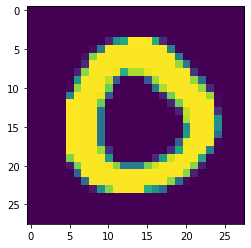

In [14]:
plt.imshow(abc)

In [15]:
abc.shape

(28, 28)

In [16]:
mnist1 = mnist.iloc[:, 1:786]

In [17]:
mnist1 = np.array(mnist1)

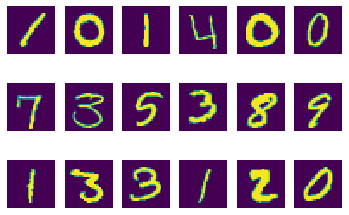

In [18]:
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

In [19]:
mnist.head(18)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
### read an image
import matplotlib.image as img
img1 = img.imread(r"C:\Users\Khushi\Desktop\khushi\IMG_20180913_091453.jpg")

In [34]:
img1.shape

(5120, 3840, 3)

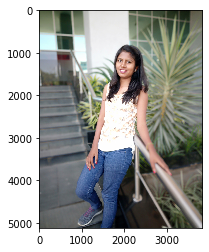

In [35]:
plt.imshow(img1)

In [59]:
import keras

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

In [60]:
mnist= pd.read_csv(r"C:\Users\Khushi\Desktop\MNIST_Train.csv")

In [61]:
mnist_x=mnist.iloc[: , 1:786]
mnist_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
mnist_y = mnist.iloc[:,0]

In [63]:
from sklearn.model_selection import train_test_split

mnist_x_train, mnist_x_test,mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size= 0.2 , random_state = 101)

In [64]:
mnist_x_train.shape

(33600, 784)

In [65]:
mnist_y_train.shape

(33600,)

In [66]:
mnist_x_test.shape

(8400, 784)

In [67]:
mnist_y_test.shape

(8400,)

# reshape each and every row

In [45]:
mnist_x_train = np.array(mnist_x_train)

for i in range(len(mnist_x_train)):
        mnist_x_train[i,].reshape(28,28)




In [46]:
mnist_x_test = np.array(mnist_x_test)

for i in range(len(mnist_x_test)):
    mnist_x_test[i,].reshape(28,28)
        


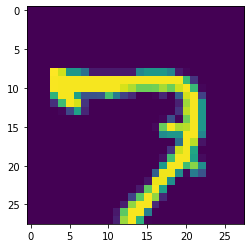

In [47]:
plt.imshow(mnist_x_train[0,].reshape(28,28))

# Normalize x test and train

In [68]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)

In [69]:
mnist_x_test = tf.keras.utils.normalize(mnist_x_test)

# Model Building

In [87]:
model =  tf.keras.models.Sequential()
model.add =(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add =(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add =(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add =(tf.keras.layers.Dense(10 , activation = tf.nn.softmax))  ## no. of layers in your target variable
## softmax is used when there are more than 2 layers in your target variable
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metric = ['accuracy'])

## adam - stochastic gradient descent

In [88]:
mnist_y_train = np.array(mnist_y_train)

In [89]:
model.fit(mnist_x_train, mnist_y_train, epochs= 5, validation_split= 0.2)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
20772     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10279     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
27518     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
36632     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2474      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8171      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21796     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31531     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31246     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18152     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41739     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24193     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
36031     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22519     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37670     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6604      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29932     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14790     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18597     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24626     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3270      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14859     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7901      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23589     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16784     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
33746     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20306     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14150     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
22633     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31616     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8535      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20191     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
15436     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38526     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17657     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28488     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9772      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18491     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19315     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
34717     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
26106     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12911     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32817     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20957     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19566     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13020     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6460      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
35391     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22148     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22056     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17357     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32137     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20463     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12363     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5695      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8006      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17745     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17931     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
20772     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
10279     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
27518     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
36632     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
2474      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
8171      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
21796     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
31531     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
31246     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
18152     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
41739     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
24193     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
36031     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
22519     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
37670     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
6604      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
29932     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
14790     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
18597     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
24626     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
3270      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
14859     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
7901      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
23589     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
40004     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
16784     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
33746     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
20306     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
41736     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
14150     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
...       ...  ...       ...       ...       ...       ...       ...   
22633     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
31616     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
8535      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
20191     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
15436     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
38526     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
17657     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
28488     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
9772      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
18491     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
19315     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
34717     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
26106     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
12911     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
32817     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
20957     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
19566     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
13020     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
6460      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
35391     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
22148     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
22056     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
17357     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
32137     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
20463     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
12363     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
5695      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
8006      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
17745     0.0  ...  0.000000       0.0       0.0       0.0       0.0   
17931     0.0  ...  0.040453       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
20772       0.0       0.0       0.0       0.0       0.0  
10279       0.0       0.0       0.0       0.0       0.0  
27518       0.0       0.0       0.0       0.0       0.0  
36632       0.0       0.0       0.0       0.0       0.0  
2474        0.0       0.0       0.0       0.0       0.0  
8171        0.0       0.0       0.0       0.0       0.0  
21796       0.0       0.0       0.0       0.0       0.0  
31531       0.0       0.0       0.0       0.0       0.0  
31246       0.0       0.0       0.0       0.0       0.0  
18152       0.0       0.0       0.0       0.0       0.0  
41739       0.0       0.0       0.0       0.0       0.0  
24193       0.0       0.0       0.0       0.0       0.0  
36031       0.0       0.0       0.0       0.0       0.0  
22519       0.0       0.0       0.0       0.0       0.0  
37670       0.0       0.0       0.0       0.0       0.0  
6604        0.0       0.0       0.0       0.0       0.0  
29932       0.0       0.0       0.0       0.0       0.0  
14790       0.0       0.0       0.0       0.0       0.0  
18597       0.0       0.0       0.0       0.0       0.0  
24626       0.0       0.0       0.0       0.0       0.0  
3270        0.0       0.0       0.0       0.0       0.0  
14859       0.0       0.0       0.0       0.0       0.0  
7901        0.0       0.0       0.0       0.0       0.0  
23589       0.0       0.0       0.0       0.0       0.0  
40004       0.0       0.0       0.0       0.0       0.0  
16784       0.0       0.0       0.0       0.0       0.0  
33746       0.0       0.0       0.0       0.0       0.0  
20306       0.0       0.0       0.0       0.0       0.0  
41736       0.0       0.0       0.0       0.0       0.0  
14150       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
22633       0.0       0.0       0.0       0.0       0.0  
31616       0.0       0.0       0.0       0.0       0.0  
8535        0.0       0.0       0.0       0.0       0.0  
20191       0.0       0.0       0.0       0.0       0.0  
15436       0.0       0.0       0.0       0.0       0.0  
38526       0.0       0.0       0.0       0.0       0.0  
17657       0.0       0.0       0.0       0.0       0.0  
28488       0.0       0.0       0.0       0.0       0.0  
9772        0.0       0.0       0.0       0.0       0.0  
18491       0.0       0.0       0.0       0.0       0.0  
19315       0.0       0.0       0.0       0.0       0.0  
34717       0.0       0.0       0.0       0.0       0.0  
26106       0.0       0.0       0.0       0.0       0.0  
12911       0.0       0.0       0.0       0.0       0.0  
32817       0.0       0.0       0.0       0.0       0.0  
20957       0.0       0.0       0.0       0.0       0.0  
19566       0.0       0.0       0.0       0.0       0.0  
13020       0.0       0.0       0.0       0.0       0.0  
6460        0.0       0.0       0.0       0.0       0.0  
35391       0.0       0.0       0.0       0.0       0.0  
22148       0.0       0.0       0.0       0.0       0.0  
22056       0.0       0.0       0.0       0.0       0.0  
17357       0.0       0.0       0.0       0.0       0.0  
32137       0.0       0.0       0.0       0.0       0.0  
20463       0.0       0.0       0.0       0.0       0.0  
12363       0.0       0.0       0.0       0.0       0.0  
5695        0.0       0.0       0.0       0.0       0.0  
8006        0.0       0.0       0.0       0.0       0.0  
17745       0.0       0.0       0.0       0.0       0.0  
17931       0.0       0.0       0.0       0.0       0.0  

[33600 rows x 784 columns]

# PREDICTION AND CONFUSION MATRIX

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
pred1 = model.predict_classes(mnist_x_test)


ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
20209     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7136      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17339     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37117     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22572     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3652      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31974     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
39025     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14668     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8047      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31416     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11758     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23220     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6626      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14722     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20508     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32244     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41659     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
26144     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23927     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8921      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14206     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30861     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22687     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23305     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19550     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
708       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8572      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
35303     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36469     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29449     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20665     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41167     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41519     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12010     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40688     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23727     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30650     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
27546     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
36823     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1159      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38423     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19904     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5493      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13168     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16669     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
18738     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32356     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31602     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30692     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
486       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11093     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2146      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14404     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
32540     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
34638     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17466     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22274     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
20209     0.0  ...       0.0       0.0       0.0       0.0       0.0   
7136      0.0  ...       0.0       0.0       0.0       0.0       0.0   
17339     0.0  ...       0.0       0.0       0.0       0.0       0.0   
37117     0.0  ...       0.0       0.0       0.0       0.0       0.0   
22572     0.0  ...       0.0       0.0       0.0       0.0       0.0   
3652      0.0  ...       0.0       0.0       0.0       0.0       0.0   
31974     0.0  ...       0.0       0.0       0.0       0.0       0.0   
39025     0.0  ...       0.0       0.0       0.0       0.0       0.0   
14668     0.0  ...       0.0       0.0       0.0       0.0       0.0   
14004     0.0  ...       0.0       0.0       0.0       0.0       0.0   
8047      0.0  ...       0.0       0.0       0.0       0.0       0.0   
31416     0.0  ...       0.0       0.0       0.0       0.0       0.0   
11758     0.0  ...       0.0       0.0       0.0       0.0       0.0   
23220     0.0  ...       0.0       0.0       0.0       0.0       0.0   
6626      0.0  ...       0.0       0.0       0.0       0.0       0.0   
14722     0.0  ...       0.0       0.0       0.0       0.0       0.0   
20508     0.0  ...       0.0       0.0       0.0       0.0       0.0   
32244     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41659     0.0  ...       0.0       0.0       0.0       0.0       0.0   
26144     0.0  ...       0.0       0.0       0.0       0.0       0.0   
23927     0.0  ...       0.0       0.0       0.0       0.0       0.0   
8921      0.0  ...       0.0       0.0       0.0       0.0       0.0   
14206     0.0  ...       0.0       0.0       0.0       0.0       0.0   
30861     0.0  ...       0.0       0.0       0.0       0.0       0.0   
22687     0.0  ...       0.0       0.0       0.0       0.0       0.0   
23305     0.0  ...       0.0       0.0       0.0       0.0       0.0   
19550     0.0  ...       0.0       0.0       0.0       0.0       0.0   
708       0.0  ...       0.0       0.0       0.0       0.0       0.0   
8572      0.0  ...       0.0       0.0       0.0       0.0       0.0   
35303     0.0  ...       0.0       0.0       0.0       0.0       0.0   
...       ...  ...       ...       ...       ...       ...       ...   
36469     0.0  ...       0.0       0.0       0.0       0.0       0.0   
29449     0.0  ...       0.0       0.0       0.0       0.0       0.0   
20665     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41167     0.0  ...       0.0       0.0       0.0       0.0       0.0   
41519     0.0  ...       0.0       0.0       0.0       0.0       0.0   
12010     0.0  ...       0.0       0.0       0.0       0.0       0.0   
40688     0.0  ...       0.0       0.0       0.0       0.0       0.0   
23727     0.0  ...       0.0       0.0       0.0       0.0       0.0   
30650     0.0  ...       0.0       0.0       0.0       0.0       0.0   
27546     0.0  ...       0.0       0.0       0.0       0.0       0.0   
36823     0.0  ...       0.0       0.0       0.0       0.0       0.0   
1159      0.0  ...       0.0       0.0       0.0       0.0       0.0   
38423     0.0  ...       0.0       0.0       0.0       0.0       0.0   
11113     0.0  ...       0.0       0.0       0.0       0.0       0.0   
19904     0.0  ...       0.0       0.0       0.0       0.0       0.0   
5493      0.0  ...       0.0       0.0       0.0       0.0       0.0   
13168     0.0  ...       0.0       0.0       0.0       0.0       0.0   
16669     0.0  ...       0.0       0.0       0.0       0.0       0.0   
18738     0.0  ...       0.0       0.0       0.0       0.0       0.0   
32356     0.0  ...       0.0       0.0       0.0       0.0       0.0   
31602     0.0  ...       0.0       0.0       0.0       0.0       0.0   
30692     0.0  ...       0.0       0.0       0.0       0.0       0.0   
486       0.0  ...       0.0       0.0       0.0       0.0       0.0   
11093     0.0  ...       0.0       0.0       0.0       0.0       0.0   
2146      0.0  ...       0.0       0.0       0.0       0.0       0.0   
14404     0.0  ...       0.0       0.0       0.0       0.0       0.0   
32540     0.0  ...       0.0       0.0       0.0       0.0       0.0   
34638     0.0  ...       0.0       0.0       0.0       0.0       0.0   
17466     0.0  ...       0.0       0.0       0.0       0.0       0.0   
22274     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
20209       0.0       0.0       0.0       0.0       0.0  
7136        0.0       0.0       0.0       0.0       0.0  
17339       0.0       0.0       0.0       0.0       0.0  
37117       0.0       0.0       0.0       0.0       0.0  
22572       0.0       0.0       0.0       0.0       0.0  
3652        0.0       0.0       0.0       0.0       0.0  
31974       0.0       0.0       0.0       0.0       0.0  
39025       0.0       0.0       0.0       0.0       0.0  
14668       0.0       0.0       0.0       0.0       0.0  
14004       0.0       0.0       0.0       0.0       0.0  
8047        0.0       0.0       0.0       0.0       0.0  
31416       0.0       0.0       0.0       0.0       0.0  
11758       0.0       0.0       0.0       0.0       0.0  
23220       0.0       0.0       0.0       0.0       0.0  
6626        0.0       0.0       0.0       0.0       0.0  
14722       0.0       0.0       0.0       0.0       0.0  
20508       0.0       0.0       0.0       0.0       0.0  
32244       0.0       0.0       0.0       0.0       0.0  
41659       0.0       0.0       0.0       0.0       0.0  
26144       0.0       0.0       0.0       0.0       0.0  
23927       0.0       0.0       0.0       0.0       0.0  
8921        0.0       0.0       0.0       0.0       0.0  
14206       0.0       0.0       0.0       0.0       0.0  
30861       0.0       0.0       0.0       0.0       0.0  
22687       0.0       0.0       0.0       0.0       0.0  
23305       0.0       0.0       0.0       0.0       0.0  
19550       0.0       0.0       0.0       0.0       0.0  
708         0.0       0.0       0.0       0.0       0.0  
8572        0.0       0.0       0.0       0.0       0.0  
35303       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
36469       0.0       0.0       0.0       0.0       0.0  
29449       0.0       0.0       0.0       0.0       0.0  
20665       0.0       0.0       0.0       0.0       0.0  
41167       0.0       0.0       0.0       0.0       0.0  
41519       0.0       0.0       0.0       0.0       0.0  
12010       0.0       0.0       0.0       0.0       0.0  
40688       0.0       0.0       0.0       0.0       0.0  
23727       0.0       0.0       0.0       0.0       0.0  
30650       0.0       0.0       0.0       0.0       0.0  
27546       0.0       0.0       0.0       0.0       0.0  
36823       0.0       0.0       0.0       0.0       0.0  
1159        0.0       0.0       0.0       0.0       0.0  
38423       0.0       0.0       0.0       0.0       0.0  
11113       0.0       0.0       0.0       0.0       0.0  
19904       0.0       0.0       0.0       0.0       0.0  
5493        0.0       0.0       0.0       0.0       0.0  
13168       0.0       0.0       0.0       0.0       0.0  
16669       0.0       0.0       0.0       0.0       0.0  
18738       0.0       0.0       0.0       0.0       0.0  
32356       0.0       0.0       0.0       0.0       0.0  
31602       0.0       0.0       0.0       0.0       0.0  
30692       0.0       0.0       0.0       0.0       0.0  
486         0.0       0.0       0.0       0.0       0.0  
11093       0.0       0.0       0.0       0.0       0.0  
2146        0.0       0.0       0.0       0.0       0.0  
14404       0.0       0.0       0.0       0.0       0.0  
32540       0.0       0.0       0.0       0.0       0.0  
34638       0.0       0.0       0.0       0.0       0.0  
17466       0.0       0.0       0.0       0.0       0.0  
22274       0.0       0.0       0.0       0.0       0.0  

[8400 rows x 784 columns]

In [55]:
tab1 = confusion_matrix(pred1, mnist_y_test)
tab1
tab1.diagonal().sum()  / tab.sum() *100   #### gives the accuracy

NameError: name 'pred1' is not defined

In [ ]:
model.fit(mnist_x_train, mnist_y_train, epochs= 10, validation_split= 0.2, batch_size= 256)

In [ ]:
pred1 = model.predict_classes(mnist_x_test)
tab1 = confusion_matrix(pred1, mnist_y_test)
tab1.diagonal().sum()  / tab.sum() *100   #### gives the accuracy